In [92]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [93]:
(X_train, y_train) , (X_test, y_test) = datasets.mnist.load_data()

In [94]:
print(X_train.shape)     ## Printing all the shapes
print(y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28) (10000,)


### There are 10,000 different test images in the dataset

In [95]:
test_images = np.random.randint(0,10000,5)   ## Generating a random set of test images
test_images


array([4291, 6867, 1159, 9853, 6710])

In [96]:
X_test[10] ## A random element of the dataset

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61,   3,
         42, 118, 193, 118, 118,  61,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14, 179, 245, 236,
        242, 254, 254, 254, 254, 245, 235,  84,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 151, 254, 254, 254,
        213, 192, 178, 178, 180, 254, 254, 241,  46,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  43, 235, 254, 226,  64,
         28,  12,   0,   0,   2, 128, 252, 255, 173,  17,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  56, 254, 253, 107,   0,
          0,   0,   0,   0,   0,   0, 134, 250, 254,  75,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  63, 254, 158,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 221, 254, 157,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 194, 254, 103,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 150, 254, 213,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  34, 220, 239,  58,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  84, 254, 213,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 126, 254, 171,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  84, 254, 213,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 214, 239,  60,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  84, 254, 213,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 214, 199,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  84, 254, 213,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  11, 219, 199,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  84, 254, 213,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  98, 254, 199,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 162, 254, 209,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  98, 254, 199,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  51, 238, 254,  75,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  98, 254, 199,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  51, 165, 254, 195,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  66, 241, 199,   0,   0,   0,   0,
          0,   0,   0,   0,   3, 167, 254, 227,  55,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 214, 213,  20,   0,   0,   0,
          0,   0,  46, 152, 202, 254, 254,  63,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 214, 254, 204, 180, 180, 180,
        180, 180, 235, 254, 254, 234, 156,  10,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  81, 205, 254, 254, 254, 254,
        254, 254, 254, 252, 234, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  26, 210, 254, 254, 254,
        254, 254, 153, 104,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

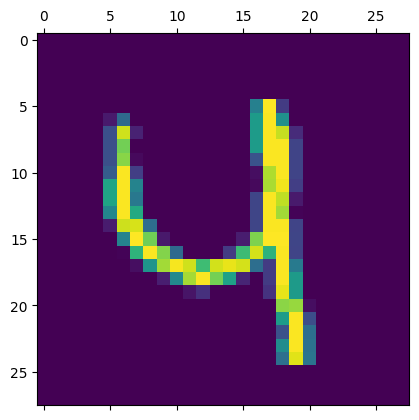

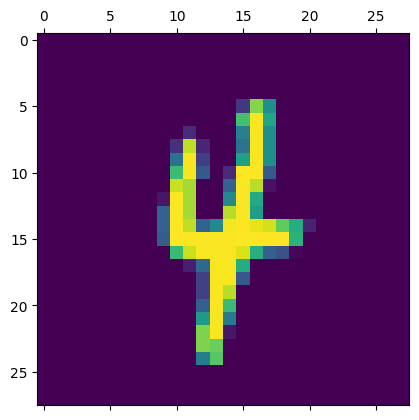

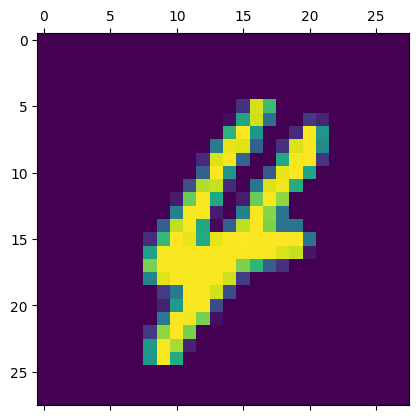

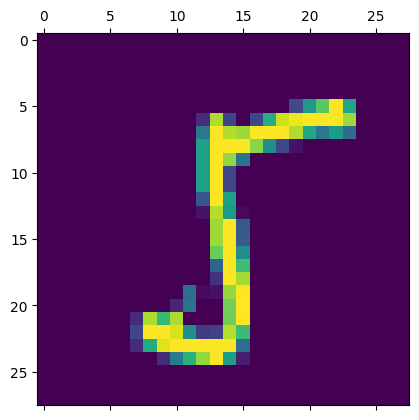

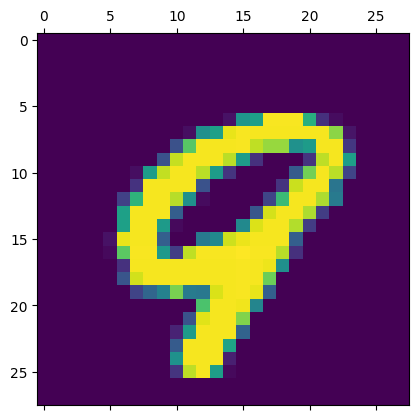

In [97]:
for i in test_images :
  plt.matshow(X_test[i])

### Now using ANNs to predict


In [98]:
## Normalizing the values first to 0-1
X_train = X_train/ 255.0
X_test = X_test/ 255.0

In [99]:
ann=models.Sequential([
    layers.Flatten(input_shape=(28,28)), #this code converts our input image of 28x28 to a single layer
    layers.Dense(128,activation='relu'), #this forms a hidden layer with 128 neurons
    layers.Dense(10,activation='softmax')  #this forms the output layer with 10 choices from 0-9
])
ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10) # training the ann model

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2546 - accuracy: 0.9276
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1121 - accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0769 - accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0584 - accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0447 - accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0362 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0283 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0227 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0190 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.015

In [100]:
test_loss, test_accuracy = ann.evaluate(X_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy*100,"%")



313/313 [==============================] - 1s 2ms/step - loss: 0.0811 - accuracy: 0.9776
Test Loss: 0.08106021583080292
Test Accuracy: 97.75999784469604 %


### Thus the ann has an accuracy of around 97.75 %

In [101]:
ans = ann.predict(X_test)
for i in test_images:
  print(np.argmax(ans[i]))  ## It predicts our random test cases correctly

313/313 [==============================] - 1s 2ms/step
4
4
4
5
9


In [107]:
## Now coding cnns

cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)), #this creates a 2D convolutional layer
    layers.MaxPooling2D((2, 2)),  # this creates a pooling layer

    layers.Conv2D(filters = 64,kernel_size =  (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters = 128,kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])




In [108]:
cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [109]:
cnn.summary()  ## Our model's details

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 1, 1, 128)       

In [110]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1954 - accuracy: 0.9391
Epoch 2/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0682 - accuracy: 0.9795
Epoch 3/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0474 - accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0341 - accuracy: 0.9891
Epoch 5/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0283 - accuracy: 0.9908
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0219 - accuracy: 0.9927
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0184 - accuracy: 0.9942
Epoch 8/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0164 - accuracy: 0.9947
Epoch 9/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0139 - accuracy: 0.9954
Epoch 10/10
1875/1875 [==============================] - 59s 32m

In [111]:
loss, accuracy = cnn.evaluate(X_test,y_test)
print("Accuracy of the cnn model is : ",accuracy*100,"%")

313/313 [==============================] - 3s 10ms/step - loss: 0.0560 - accuracy: 0.9866
Accuracy of the cnn model is :  98.65999817848206 %


### Thus the CNN model has an accuracy of about 98.66%

In [112]:
ans = cnn.predict(X_test)
for i in test_images:
  print(np.argmax(ans[i]))  ## It also predicts our random test cases correctly

313/313 [==============================] - 3s 10ms/step
4
4
4
5
9


## Thus, the cnn model(98.66%) has a better accuracy than our ann model(97.75%)




